## Learning a variable coefficient advection

To verify that our PINN implementation is working well, we test the PINN on the following problem:
$$
    \begin{cases}
        u_t + a(x)u_x = 0\\
        \lim_{|x|\rightarrow\infty}u(t, x) = 0\\
        u(0, x) = u_0(x)
    \end{cases}
$$ where $u_0 = \mathcal{N}(x|0, 1)$. Here $a(x)$ is a function in space.

In [76]:
from PINN.AdvectionNet import *
# Testing
import matplotlib.pyplot as plt
import torch
import numpy as np
import scipy

# set random seeds
np.random.seed(10)
torch.manual_seed(10);
import numpy as np    
import matplotlib.pyplot as plt

In [79]:
# define computational grids
xmin, xmax = -4., 4.
nx = 2000
xgrid = np.linspace(xmin, xmax, nx)

dt = 0.001
tmax = 5.0
tgrid = np.arange(0, tmax, dt)
nt = len(tgrid)

# define advection function
v = lambda x: np.sin(-x)

# create data simulator
scheme = LinearAdvection1d(v, tgrid, xgrid)


In [83]:
#############  
# Start of the code
###################

# initial value
x = xgrid
u0=(1/(np.sqrt(2*np.pi)))*np.exp(-0.5*((x)**2))
u_sol = np.zeros([nt, nx])
u_prev = u0
for i in range(nt):
    u_sol[i, :] = u_prev
    u_new = scheme.step(u_prev)
    u_prev = u_new

sigma = 0.0
u_sol = u_sol + sigma * np.random.randn(u_sol.shape[0], u_sol.shape[1])

# save data for testing
scipy.io.savemat("../data/LinearOscillator/Space_Advection.mat", {
    "xgrid": x.reshape(1, -1),
    "tgrid": tgrid.reshape(1, -1),
    "pmc": u_sol
})

# save a smaller dataset
subsample_t = 5
subsample_x = 5
xgrid_small = x.reshape(1, -1)[:, 0:-1:subsample_x].squeeze(),
tgrid_small = tgrid.reshape(1, -1)[:, 0:-1:subsample_t].squeeze()
u_sol_small = u_sol[0:-1:subsample_t, 0:-1:subsample_x]
scipy.io.savemat("../data/LinearOscillator/Space_Advection_small.mat", {
    "xgrid": xgrid_small,
    "tgrid": tgrid_small,
    "pmc": u_sol_small
})
print("Training data size = {}\n".format(u_sol_small.shape))

Training data size = (1000, 400)



KeyboardInterrupt: 

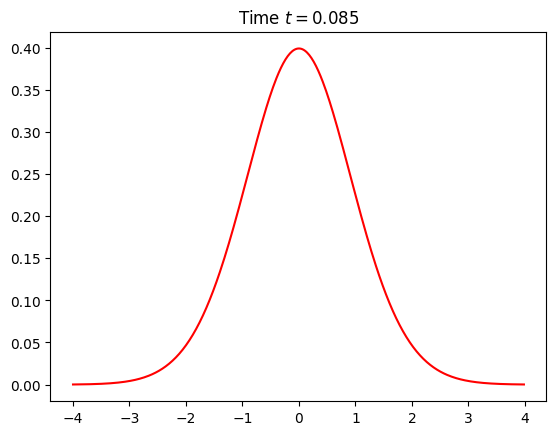

In [84]:
# visualize solution
import time
import pylab as pl
from IPython import display
from IPython.display import clear_output

dt_small = tgrid_small[1]-tgrid_small[0]
for i in range(len(tgrid_small)):
    plt.figure(1);
    plt.plot(xgrid_small[0], u_sol_small[i, :], color="red");
    plt.title(r"Time $t = {}$".format((i+1)*dt_small));
    display.clear_output(wait=True);
    display.display(pl.gcf());
    plt.clf();

In [85]:
# testing PINN # inverse problem with PINN
#data_path = "../data/LinearOscillator/Pure_Advection.mat"
# subsampled spatial training data
data_path = "../data/LinearOscillator/Space_Advection_small.mat"
# create PINN
pinn = AdvectionNet(indim=2, outdim=1, data_path=data_path, scheduler="ExponentialLR")
# testing training
info = train(
    pinn, pinn.optimizer, pinn.scheduler, batch_size=2**9,
    epochs=200, batch_print=200, mode="all"
)

------------------------------------------------------------

=> Data Loaded at: ../data/LinearOscillator/Space_Advection_small.mat 

----> Total Number of observations = 397602 

------------------------------------------------------------

------------------------------------------------------------------

|                      Epoch 1                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000980
Batch PDE Loss = 0.0002002879491957297 

Batch Data Loss = 0.0005258100410842448 

------------------------------------------------------------------

|                      Epoch 2                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000970

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000810
Batch PDE Loss = 5.087842434780129e-05 

Batch Data Loss = 3.0464102978637023e-05 

------------------------------------------------------------------

|                      Epoch 21                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000802
Batch PDE Loss = 5.201522329371541e-05 

Batch Data Loss = 2.9304059667610184e-05 

------------------------------------------------------------------

|                      Epoch 22                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000794
Batch PDE Loss = 4.9818690599100234e-

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000662
Batch PDE Loss = 4.954266821667367e-05 

Batch Data Loss = 2.682943380097666e-05 

------------------------------------------------------------------

|                      Epoch 41                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000656
Batch PDE Loss = 5.1352985694452335e-05 

Batch Data Loss = 2.7601714275320675e-05 

------------------------------------------------------------------

|                      Epoch 42                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000649
Batch PDE Loss = 5.0141970361423626e-

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000542
Batch PDE Loss = 5.178409084621332e-05 

Batch Data Loss = 2.6801291544344666e-05 

------------------------------------------------------------------

|                      Epoch 61                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000536
Batch PDE Loss = 5.06739381649186e-05 

Batch Data Loss = 2.595698991938017e-05 

------------------------------------------------------------------

|                      Epoch 62                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000531
Batch PDE Loss = 5.067943319429159e-05 

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000443
Batch PDE Loss = 3.978699298887185e-05 

Batch Data Loss = 1.588319868335456e-05 

------------------------------------------------------------------

|                      Epoch 81                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000439
Batch PDE Loss = 4.0135318463968874e-05 

Batch Data Loss = 1.5667915601851597e-05 

------------------------------------------------------------------

|                      Epoch 82                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000434
Batch PDE Loss = 4.011839246251786e-0

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000362
Batch PDE Loss = 3.621768922060349e-05 

Batch Data Loss = 1.3100308230243866e-05 

------------------------------------------------------------------

|                      Epoch 101                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000359
Batch PDE Loss = 3.364960246074119e-05 

Batch Data Loss = 1.2596594789417787e-05 

------------------------------------------------------------------

|                      Epoch 102                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000355
Batch PDE Loss = 3.364899256716022e

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000296
Batch PDE Loss = 3.5485031243305127e-05 

Batch Data Loss = 1.177684958647834e-05 

------------------------------------------------------------------

|                      Epoch 121                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000293
Batch PDE Loss = 3.4797314351267075e-05 

Batch Data Loss = 1.153615904794667e-05 

------------------------------------------------------------------

|                      Epoch 122                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000290
Batch PDE Loss = 3.3272841110126714

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000242
Batch PDE Loss = 3.4517893728322626e-05 

Batch Data Loss = 9.916874270163729e-06 

------------------------------------------------------------------

|                      Epoch 141                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000240
Batch PDE Loss = 3.4520532883024004e-05 

Batch Data Loss = 9.881865977152975e-06 

------------------------------------------------------------------

|                      Epoch 142                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000238
Batch PDE Loss = 3.427672949056369e

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000198
Batch PDE Loss = 2.9308108721093005e-05 

Batch Data Loss = 7.969536648650322e-06 

------------------------------------------------------------------

|                      Epoch 161                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000196
Batch PDE Loss = 2.9677997516516803e-05 

Batch Data Loss = 8.1261992284317e-06 

------------------------------------------------------------------

|                      Epoch 162                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000194
Batch PDE Loss = 2.9622656896440338e-

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000162
Batch PDE Loss = 3.0322427056104965e-05 

Batch Data Loss = 8.140048017717245e-06 

------------------------------------------------------------------

|                      Epoch 181                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000161
Batch PDE Loss = 3.0488636645463836e-05 

Batch Data Loss = 8.052033869982206e-06 

------------------------------------------------------------------

|                      Epoch 182                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000159
Batch PDE Loss = 3.302699582720846e

| => | Batch 201 |

| => | Batch 401 |

| => | Batch 601 |

---------- 

++ Learning rate reduced, now at = 0.000133
Batch PDE Loss = 2.9186568056477824e-05 

Batch Data Loss = 8.539351975959343e-06 



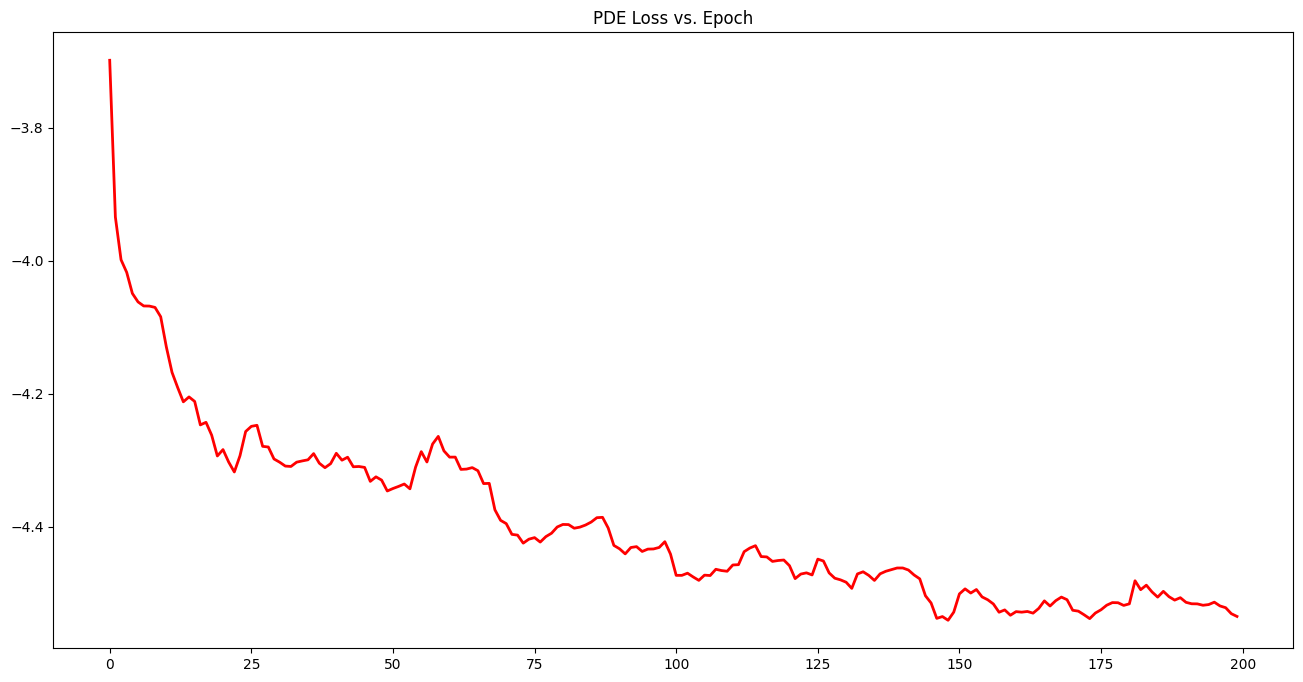

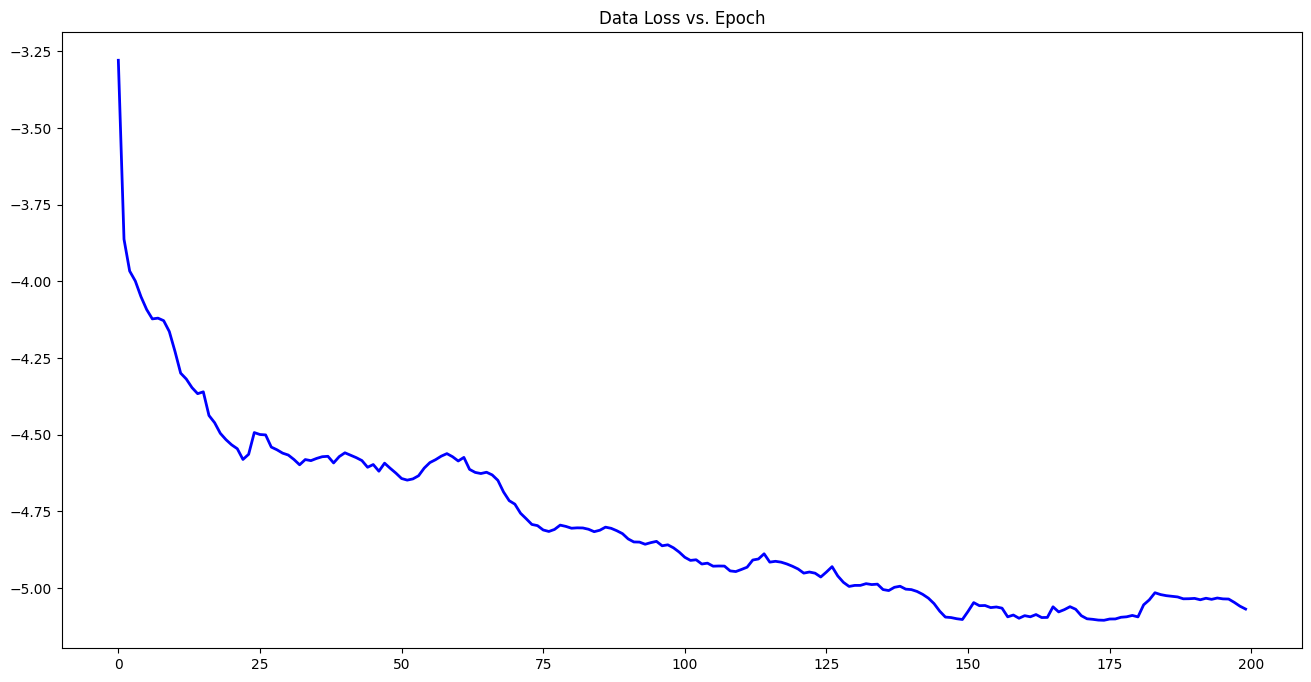

In [86]:
# visualize losses
plt.figure(1, figsize=(16, 8));
plt.plot(np.log10(info["pde_loss"]), lw=2, color="red");
plt.title("PDE Loss vs. Epoch");

plt.figure(2, figsize=(16, 8));
plt.plot(np.log10(info["data_loss"]), lw=2, color="blue");
plt.title("Data Loss vs. Epoch");

# plt.figure(3, figsize=(16, 8));
# plt.plot(np.log10(info["reg_loss"]), lw=2, color="purple");
# plt.title("Regularity Loss vs. Epoch");
query = cartesian_data(pinn.tgrid, pinn.xgrid)

# D_pred = pinn.D_nn(query).reshape(pinn.nx, pinn.nt).T.detach().numpy()
# G_pred = pinn.G_nn(query).reshape(pinn.nx, pinn.nt).T.detach().numpy()
p_pred = pinn(query).reshape(pinn.nx, pinn.nt).T.detach().numpy()

# grids
tgrid = pinn.tgrid.detach().numpy()
xgrid = pinn.xgrid.detach().numpy()

p_exact = pinn.raw_data["pmc"]
dx = pinn.dx.item()
dt = pinn.dt.item()

# plt.figure(1);
# plt.contourf(xgrid, tgrid, G_pred);
# plt.colorbar();

# plt.figure(2);
# plt.plot(xgrid, G_pred[0:-1:10, :].T, alpha=0.4, lw=1.5);
# plt.plot(xgrid, 1.1*np.ones_like(xgrid), "--", lw=4.5, color="red", alpha=0.8, label="exact");
# plt.legend();

In [92]:
nx = 800
xgrid_fine = np.linspace(xmin, xmax, nx)
xgrid_fine = torch.tensor(xgrid_fine)
dx = xgrid_fine[1]-xgrid_fine[0]
nt = 1000
tgrid_fine = np.linspace(0., 5.0, nt)
tgrid_fine = torch.tensor(tgrid_fine)
dt = (tgrid_fine[1]-tgrid_fine[0]).item()

query_fine = cartesian_data(tgrid_fine, xgrid_fine)

G_pred_fine = pinn.G_nn(query_fine[:, 1][:, None]).reshape(nx, nt).T.detach().numpy()
p_pred_fine = pinn(query_fine).reshape(nx, nt).T.detach().numpy()

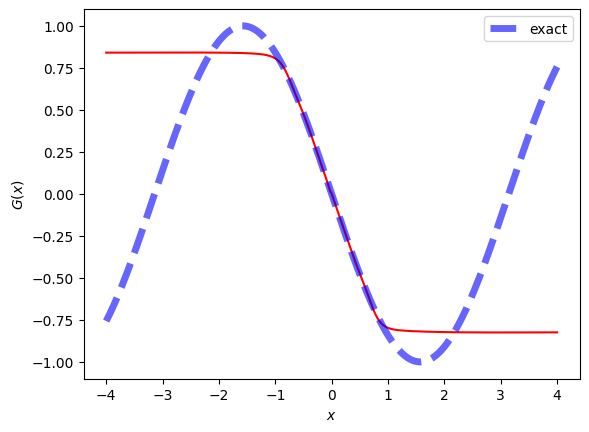

In [93]:
plt.figure(1);
plt.plot(xgrid_fine, G_pred_fine[0, :], color="red");
plt.plot(xgrid_fine, v(xgrid_fine), "--", color="blue", lw=5.0, alpha=.6, label="exact");
plt.legend(); 
plt.xlabel(r"$x$");
plt.ylabel(r"$G(x)$");

(1000, 800)


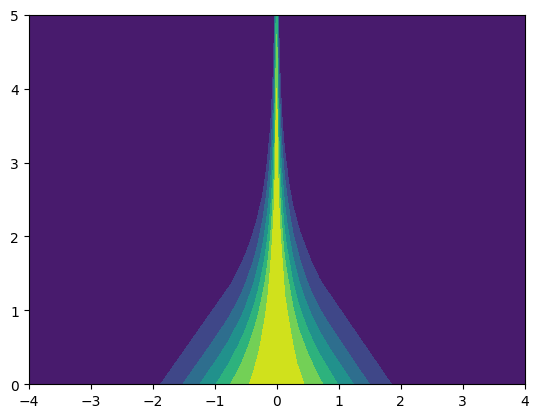

In [94]:
# interpolation
print(p_pred_fine.shape)
plt.contourf(xgrid_fine.detach().numpy(), tgrid_fine.detach().numpy(), p_pred_fine);

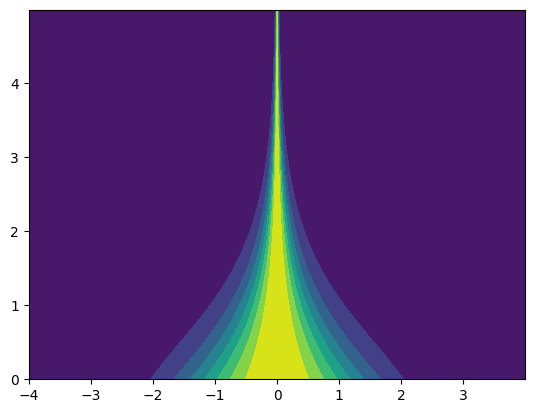

In [95]:
plt.contourf(pinn.xgrid.detach().numpy(), pinn.tgrid.detach().numpy(), pinn.raw_data["pmc"]);

In [99]:
dx = dx.item()

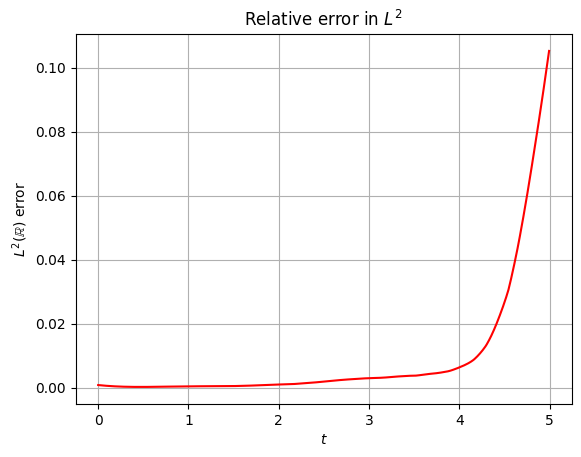

In [100]:
plt.figure(2);
# relative error in L^2 from KDE benchmark
l2_rel_err = np.sum(((p_pred-p_exact)**2)*dx, 1) / np.sum((p_exact**2)*dx, 1)
tgrid = pinn.tgrid.detach().numpy()
plt.plot(tgrid, l2_rel_err, color="red", lw=1.5);
plt.grid(True);
plt.title(r"Relative error in $L^2$");
plt.xlabel(r"$t$"); 
plt.ylabel(r"$L^2(\mathbb{R})$ error");

In [108]:
model_path = "./PINN/models/nonlinear_advection_epoch_200"
torch.save(pinn.state_dict(), model_path)

In [ ]:
torch.load(model_path)